In [2]:
!pip uninstall -y numpy scipy scikit-learn
!pip uninstall -y pandas matplotlib seaborn plotly
!pip uninstall -y rdkit


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: plotly 5.24.1
Uninstalling plotly-5.24.1:
  Successfully uninstalled plotly-5.24.1


In [3]:
pip install --no-cache-dir "numpy<2"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 230.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.2 requires pandas>=0.24.2, which is not installed.
clarabel 0.10.0 requires scipy, which is not installed.
datascience 0.17.6 requires matplotlib>=3.0.0, which is not installed.
datascience 0.17.6 requires pandas, which is not installed.
datascience 0.17.6 requires plotly, which is not installed.
datascience 0.17.6 requires scipy, which is not installed.
librosa 0.11.0 requires scikit-learn>=1.1.0, which is not installed.
librosa 0.11.0 requires scipy>=1.6.0, which is not installed.
sklearn-pandas 2.2.0 requires pandas>=1.1.4, which is not installed.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, which is not installed.
sklearn-pandas 2.2

In [4]:
pip install --no-cache-dir scipy scikit-learn pandas matplotlib seaborn plotly rdkit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 160.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 149.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 161.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 155.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 147.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 165.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 80.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [1]:
import requests
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px
import pandas as pd

# データのダウンロードと読み込み
url = "https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/solubility.train.sdf"
r = requests.get(url)
with open("solubility.train.sdf", "w") as f:
    f.write(r.text)

suppl = Chem.SDMolSupplier("solubility.train.sdf")

# 化学構造のSMILES表現への変換とFCFP6の計算
smiles = []
fingerprints = []
solubility = []

for m in suppl:
    smiles.append(Chem.MolToSmiles(m))
    fp = AllChem.GetMorganFingerprintAsBitVect(m, 3, nBits=2048)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprints.append(arr)
    solubility.append(float(m.GetProp('SOL')))

# t-SNEによる2次元への次元削減
X = np.array(fingerprints)
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

# データフレームの作成
df = pd.DataFrame(X_reduced, columns=["Component 1", "Component 2"])
df["SMILES"] = smiles
df["Solubility"] = solubility

# 可視化
fig = px.scatter(df,
                 x="Component 1",
                 y="Component 2",
                 color="Solubility",
                 hover_data=["SMILES"])
fig.show()

[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerator
[04:51:46] DEPRECATION WARNING: please use MorganGenerat

In [2]:
import requests
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# データのダウンロードと読み込み
url = 'https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/solubility.train.sdf'
r = requests.get(url)
with open('solubility.train.sdf', 'w') as f:
    f.write(r.text)

suppl = Chem.SDMolSupplier('solubility.train.sdf')

# 記述子のリストを作成
desc_list_from_desc = [x[0] for x in Descriptors.descList]
desc_list_from_rdMol = [x for x in rdMolDescriptors.Properties.GetAvailableProperties()]
dup_list = list(set(desc_list_from_desc) & set(desc_list_from_rdMol))
desc_list_from_rdMol = list(set(desc_list_from_rdMol) - set(dup_list))
desc_list = desc_list_from_desc + desc_list_from_rdMol

# 化学構造をSMILES表現に変換し、記述子を計算
smiles = []
desc_values = []
solubility = []

for m in suppl:
    smiles.append(Chem.MolToSmiles(m))
    desc_values.append([desc(m) if 'Count' not in name and 'Charge' not in name and 'Smarts' not in name else 0 for name, desc in Descriptors.descList])
    desc_values[-1] += list(rdMolDescriptors.Properties(desc_list_from_rdMol).ComputeProperties(m))
    solubility.append(float(m.GetProp('SOL')))

# データフレームの作成とNaNを含む列の削除
desc_df = pd.DataFrame(desc_values, columns=desc_list)
desc_df = desc_df.dropna(axis=1)

# データの正規化
scaler = StandardScaler()
desc_df = pd.DataFrame(scaler.fit_transform(desc_df), columns=desc_df.columns)

# t-SNEによる映像化
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(desc_df)

# データフレームの作成
df = pd.DataFrame(X_reduced, columns=["Component 1", "Component 2"])
df["SMILES"] = smiles
df["Solubility"] = solubility

# plotlyで描画
fig = px.scatter(df,
                 x='Component 1',
                 y='Component 2',
                 color='Solubility',
                 hover_data=['SMILES'])
fig.show()

In [4]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 18.7 MB/s eta 0:00:00


In [5]:
import requests
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors
import optuna
import pandas as pd
import numpy as np
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

# データのダウンロードと読み込み
url = 'https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/solubility.train.sdf'
r = requests.get(url)
with open('solubility.train.sdf', 'w') as f:
    f.write(r.text)

suppl = Chem.SDMolSupplier('solubility.train.sdf')

# 記述子のリストを作成
desc_list = [x[0] for x in Descriptors.descList]

# 化学構造をSMILES表現に変換し、記述子を計算
smiles = []
desc_values = []
solubility = []

for m in suppl:
    smiles.append(Chem.MolToSmiles(m))
    desc_values.append([desc(m) for desc in [x[1] for x in Descriptors.descList]])
    solubility.append(float(m.GetProp('SOL')))

# データフレームの作成とNaNを含む列の削除
desc_df = pd.DataFrame(desc_values, columns=desc_list)
desc_df = desc_df.dropna(axis=1)

# データの正規化
scaler = StandardScaler()
desc_df = pd.DataFrame(scaler.fit_transform(desc_df), columns=desc_df.columns)

# 定義：スピアマン順位相関係数を計算する関数
def calc_spearman(X1, X2):
    nearest_neighbors = NearestNeighbors(n_neighbors=6, metric="euclidean")
    nearest_neighbors.fit(X1)
    rank1 = nearest_neighbors.kneighbors(return_distance=False)

    nearest_neighbors = NearestNeighbors(n_neighbors=6, metric="euclidean")
    nearest_neighbors.fit(X2)
    rank2 = nearest_neighbors.kneighbors(return_distance=False)

    rank_corr = 0
    for r1, r2 in zip(rank1, rank2):
        rank_corr += spearmanr(r1[1:], r2[1:]).correlation
    return rank_corr / X1.shape[0]

# ハイパーパラメーターチューニング
def objective(trial):
    params = {
        'n_components': trial.suggest_int('n_components', 2, 3),
        'perplexity': trial.suggest_int('perplexity', 5, 50),
        'early_exaggeration': trial.suggest_int('early_exaggeration', 10, 100),
        'learning_rate': trial.suggest_int('learning_rate', 10, 1000),
        'n_iter': trial.suggest_int('n_iter', 500, 2000),
        'n_iter_without_progress': trial.suggest_int('n_iter_without_progress', 250, 500),
        'min_grad_norm': trial.suggest_float('min_grad_norm', 1e-7, 1e-4, log=True),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
        'init': trial.suggest_categorical('init', ['random', 'pca']),
        'random_state': 42
    }
    tsne = TSNE(**params)
    X_reduced = tsne.fit_transform(desc_df)
    return -calc_spearman(desc_df.values, X_reduced)

study = optuna.create_study()
study.optimize(objective, n_trials=50)

# 最適化後のハイパーパラメーターで2次元化
best_params = study.best_params
best_params['random_state'] = 42  # 必ず同じ結果になるようにするため
tsne = TSNE(**best_params)
X_reduced = tsne.fit_transform(desc_df)

# データフレームの作成
df = pd.DataFrame(X_reduced, columns=["Component 1", "Component 2"])
df["SMILES"] = smiles
df["Solubility"] = solubility

# plotlyで描画
fig = px.scatter(df,
                 x='Component 1',
                 y='Component 2',
                 color='Solubility',
                 hover_data=['SMILES'])
fig.show()

[I 2025-03-21 04:56:20,747] A new study created in memory with name: no-name-9bc30045-b194-4768-b768-a7f98ae508e9
[I 2025-03-21 04:56:48,934] Trial 0 finished with value: 0.00985365853658537 and parameters: {'n_components': 3, 'perplexity': 27, 'early_exaggeration': 83, 'learning_rate': 736, 'n_iter': 655, 'n_iter_without_progress': 469, 'min_grad_norm': 7.073625505249533e-05, 'metric': 'manhattan', 'init': 'pca'}. Best is trial 0 with value: 0.00985365853658537.
[I 2025-03-21 04:56:57,106] Trial 1 finished with value: -0.11843902439024409 and parameters: {'n_components': 2, 'perplexity': 38, 'early_exaggeration': 96, 'learning_rate': 117, 'n_iter': 644, 'n_iter_without_progress': 494, 'min_grad_norm': 1.4839834699724467e-07, 'metric': 'minkowski', 'init': 'pca'}. Best is trial 1 with value: -0.11843902439024409.
[I 2025-03-21 04:57:05,512] Trial 2 finished with value: -0.1334634146341466 and parameters: {'n_components': 2, 'perplexity': 32, 'early_exaggeration': 79, 'learning_rate': 4

In [6]:
import requests
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# データのダウンロードと読み込み
url = 'https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/solubility.train.sdf'
r = requests.get(url)
with open('solubility.train.sdf', 'w') as f:
    f.write(r.text)

suppl = Chem.SDMolSupplier('solubility.train.sdf')

# 記述子のリストを作成
desc_list = [x[0] for x in Descriptors.descList]

# 化学構造をSMILES表現に変換し、記述子を計算
desc_values = []
solubility = []

for m in suppl:
    desc_values.append([desc(m) for desc in [x[1] for x in Descriptors.descList]])
    solubility.append(float(m.GetProp('SOL')))

# データフレームの作成とNaNを含む列の削除
desc_df = pd.DataFrame(desc_values, columns=desc_list)
desc_df = desc_df.dropna(axis=1)

# データの正規化
scaler = StandardScaler()
desc_df = pd.DataFrame(scaler.fit_transform(desc_df), columns=desc_df.columns)

# データセットをトレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(desc_df, solubility, test_size=0.2, random_state=42)

# モデルの学習
regr = RandomForestRegressor(n_estimators=100, random_state=42)
regr.fit(X_train, y_train)

# モデルの評価
y_pred = regr.predict(X_test)
print(f'R^2 score: {r2_score(y_test, y_pred)}')

R^2 score: 0.9131393648356378


In [7]:
import requests
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# データのダウンロードと読み込み
url = 'https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/solubility.train.sdf'
r = requests.get(url)
with open('solubility.train.sdf', 'w') as f:
    f.write(r.text)

suppl = Chem.SDMolSupplier('solubility.train.sdf')

# フィンガープリントのリスト
fps = ['ECFP4', 'ECFP6', 'FCFP4', 'FCFP6']

# 各フィンガープリントについて
for fp in fps:

    # フィンガープリントの計算
    if 'ECFP' in fp:
        radius = int(fp[-1])
        fp_values = [AllChem.GetMorganFingerprintAsBitVect(m, radius) for m in suppl]
    elif 'FCFP' in fp:
        radius = int(fp[-1])
        fp_values = [AllChem.GetMorganFingerprintAsBitVect(m, radius, useFeatures=True) for m in suppl]
    solubility = [float(m.GetProp('SOL')) for m in suppl]

    # データセットをトレーニングデータとテストデータに分割
    X_train, X_test, y_train, y_test = train_test_split(fp_values, solubility, test_size=0.2, random_state=42)

    # モデルの学習
    regr = RandomForestRegressor(random_state=42)
    regr.fit(X_train, y_train)

    # モデルの評価
    y_pred = regr.predict(X_test)
    print(f'{fp} R^2 score: {r2_score(y_test, y_pred)}')

[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerator
[05:17:04] DEPRECATION WARNING: please use MorganGenerat

ECFP4 R^2 score: 0.6855777089180218


[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerator
[05:17:18] DEPRECATION WARNING: please use MorganGenerat

ECFP6 R^2 score: 0.6902016616428883


[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerator
[05:17:33] DEPRECATION WARNING: please use MorganGenerat

FCFP4 R^2 score: 0.75367484883088


[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerator
[05:17:44] DEPRECATION WARNING: please use MorganGenerat

FCFP6 R^2 score: 0.7494240547379492


In [8]:
import requests
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

# データのダウンロードと読み込み
url = 'https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/solubility.train.sdf'
r = requests.get(url)
with open('solubility.train.sdf', 'w') as f:
    f.write(r.text)

suppl = Chem.SDMolSupplier('solubility.train.sdf')

# フィンガープリントの計算
fp_values = [AllChem.GetMorganFingerprintAsBitVect(m, 2, useFeatures=True) for m in suppl]
solubility = [float(m.GetProp('SOL')) for m in suppl]

# データセットをトレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(fp_values, solubility, test_size=0.2, random_state=42)

# モデルの学習
regr = RandomForestRegressor(random_state=42)
selector = RFECV(regr, step=0.1, cv=3)
selector = selector.fit(X_train, y_train)

# モデルの評価
y_pred = selector.predict(X_test)
print(f'R^2 score: {r2_score(y_test, y_pred)}')


[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerator
[05:17:55] DEPRECATION WARNING: please use MorganGenerat

R^2 score: 0.7240809561412997


In [9]:
import requests
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

# データのダウンロードと読み込み
url = 'https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/solubility.train.sdf'
r = requests.get(url)
with open('solubility.train.sdf', 'w') as f:
    f.write(r.text)

suppl = Chem.SDMolSupplier('solubility.train.sdf')

# フィンガープリントの計算
fp_values = [AllChem.GetMorganFingerprintAsBitVect(m, 2, useFeatures=True) for m in suppl]
solubility = [float(m.GetProp('SOL')) for m in suppl]

# データセットをトレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(fp_values, solubility, test_size=0.2, random_state=42)

# モデルの学習
regr = RandomForestRegressor(random_state=42)
selector = RFECV(regr, step=0.1, cv=3)
selector = selector.fit(X_train, y_train)

# 選ばれた特徴量をリストアップ
selected_features = np.where(selector.support_==True)
print('Selected features:', selected_features)

# モデルの評価
y_pred = selector.predict(X_test)
print(f'R^2 score: {r2_score(y_test, y_pred)}')

[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerator
[05:20:06] DEPRECATION WARNING: please use MorganGenerat

Selected features: (array([   0,    1,    2,    3,    4,    5,    6,    8,   11,   16,   17,
         18,   19,   21,   26,   29,   32,   33,   35,   40,   41,   44,
         46,   47,   48,   49,   58,   61,   62,   67,   68,   71,   72,
         75,   78,   80,   81,   86,   87,   89,   91,   94,  105,  111,
        114,  115,  122,  123,  124,  125,  127,  132,  134,  136,  139,
        141,  144,  152,  153,  156,  161,  164,  169,  173,  174,  178,
        180,  184,  186,  198,  199,  200,  201,  207,  208,  210,  211,
        213,  216,  217,  223,  224,  230,  232,  233,  234,  238,  242,
        244,  245,  246,  251,  254,  255,  256,  260,  277,  279,  280,
        283,  285,  288,  294,  299,  301,  304,  305,  306,  308,  309,
        310,  311,  312,  313,  314,  316,  317,  321,  322,  328,  334,
        336,  339,  340,  341,  343,  345,  347,  348,  349,  350,  352,
        353,  354,  355,  356,  357,  359,  360,  364,  366,  368,  377,
        381,  383,  386,  388, 

In [10]:
import requests
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

# データのダウンロードと読み込み
url = 'https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/solubility.train.sdf'
r = requests.get(url)
with open('solubility.train.sdf', 'w') as f:
    f.write(r.text)

suppl = Chem.SDMolSupplier('solubility.train.sdf')

# 目的変数
solubility = [float(m.GetProp('SOL')) for m in suppl]

In [11]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

# すべての記述子のリストを作成
all_descriptors = [desc_name[0] for desc_name in Descriptors.descList]

# 記述子を計算してデータフレームに格納
df = pd.DataFrame()
for desc in all_descriptors:
  df[desc] = [Descriptors.__dict__[desc](mol) for mol in suppl]

# NaNデータを削除
df = df.dropna(axis=1)

# 記述子をトレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(df, solubility, random_state=0)

# データのスケーリング
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 特徴量選択を行いながらランダムフォレスト回帰モデルの学習
selector = RFECV(RandomForestRegressor(n_jobs=-1), step=10, min_features_to_select=10, cv=3, n_jobs=-1)
selector.fit(X_train, y_train)

# 選択された特徴
selected_features = df.columns[selector.support_]

print('選択された特徴：', selected_features)

# テストデータに対する予測性能の評価
y_pred = selector.predict(X_test)
R2 = r2_score(y_test, y_pred)
print('R^2 スコア:', R2)

選択された特徴： Index(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'AvgIpc',
       'BalabanJ', 'BertzCT', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v',
       'Chi2v', 'Chi3v', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2',
       'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA3',
       'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SlogP_VSA2', 'SlogP_VSA4',
       'SlogP_VSA7', 'TPSA', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4',
       'EState_VSA5', 'EState_VSA7', 'EState_VSA8', 'VSA_EState10',
       'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState6',
       'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'NOCount', 'NumHAcceptors',
       'NumHeteroatoms', 'Phi', 'MolLogP', 'MolMR', 'fr_NH0'],
      dtype='object')
R^2 スコア: 0.9131608847068452


In [13]:
import plotly.graph_objects as go

# 特徴量の重要度と対応する名前を取得
feature_importances = selector.estimator_.feature_importances_
feature_names = selected_features

# 重要度でソートし、上位20個の特徴量を選択
indices = np.argsort(feature_importances)[-20:]
selected_feature_importances = feature_importances[indices]
selected_feature_names = feature_names[indices]

# プロット用のデータを準備
data = [
    go.Bar(
        x=selected_feature_importances,
        y=selected_feature_names,
        orientation='h',
    )
]

# プロットの設定
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=go.layout.Margin(
        l=150,  # 左マージン
        r=50,  # 右マージン
        b=100,  # 下マージン
        t=100,  # 上マージン
        pad=4  # パディング
    ),
    paper_bgcolor="LightSteelBlue",
)

# プロットの作成
fig = go.Figure(data=data, layout=layout)

# プロットの表示
fig.show()

In [14]:
from sklearn.inspection import permutation_importance

# 特徴の順列重要度を計算
perm_importance = permutation_importance(selector, X_test, y_test, n_jobs=-1)

# 順列重要度でソートし、上位20個の特徴量を選択
indices = perm_importance.importances_mean.argsort()[-20:]
selected_perm_importances = perm_importance.importances_mean[indices]
selected_perm_feature_names = df.columns[indices]

# プロット用のデータを準備
data = [
    go.Bar(
        x=selected_perm_importances,
        y=selected_perm_feature_names,
        orientation='h',
    )
]

# プロットの設定
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=go.layout.Margin(
        l=150,  # 左マージン
        r=50,  # 右マージン
        b=100,  # 下マージン
        t=100,  # 上マージン
        pad=4  # パディング
    ),
    paper_bgcolor="LightSteelBlue",
)

# プロットの作成
fig = go.Figure(data=data, layout=layout)

# プロットの表示
fig.show()

In [15]:
import shap

# SHAP値を計算
explainer = shap.Explainer(selector.estimator_)
shap_values = explainer(X_test)

# 平均絶対SHAP値を計算し、重要度順にソート
shap_importances = np.mean(np.abs(shap_values.values), axis=0)
indices = np.argsort(shap_importances)[-20:]

# 上位20個の重要な特徴量を選択
selected_shap_importances = shap_importances[indices]
selected_shap_feature_names = df.columns[indices]

# プロット用のデータを準備
data = [
    go.Bar(
        x=selected_shap_importances,
        y=selected_shap_feature_names,
        orientation='h',
    )
]

# プロットの設定
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=go.layout.Margin(
        l=150,  # 左マージン
        r=50,  # 右マージン
        b=100,  # 下マージン
        t=100,  # 上マージン
        pad=4  # パディング
    ),
    paper_bgcolor="LightSteelBlue",
)

# プロットの作成
fig = go.Figure(data=data, layout=layout)

# プロットの表示
fig.show()

In [3]:
!pip install bayesian-optimization --no-cache-dir

|   iter    |  target   |   data0   |   data1   |   data2   |
-------------------------------------------------------------
| 1         | -168.4    | 7.421     | 193.9     | 37.01     |
|   iter    |  target   |   data0   |   data1   |   data2   |
-------------------------------------------------------------
| 1         | -178.1    | 7.672     | 194.8     | 25.03     |
|   iter    |  target   |   data0   |   data1   |   data2   |
-------------------------------------------------------------
| 1         | -182.9    | 7.672     | 194.8     | 25.03     |
|   iter    |  target   |   data0   |   data1   |   data2   |
-------------------------------------------------------------
| 1         | -178.3    | 7.672     | 194.8     | 25.03     |
|   iter    |  target   |   data0   |   data1   |   data2   |
-------------------------------------------------------------
| 1         | -176.6    | 7.672     | 194.8     | 25.03     |
|   iter    |  target   |   data0   |   data1   |   data2   |
--------

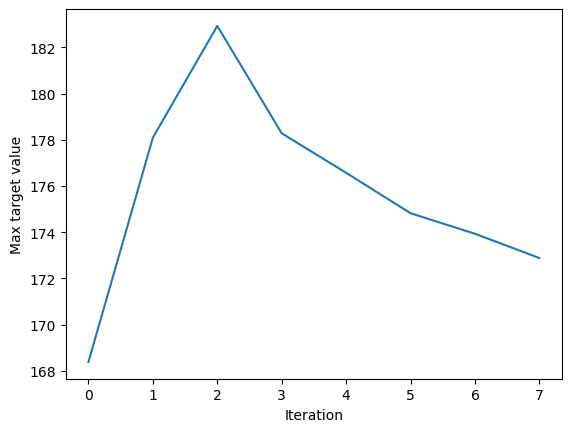

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from scipy.spatial import distance

# データセットをロード
linnerud = datasets.load_linnerud()

# データを訓練用と未知用に分割
X_known, X_unknown, y_known, y_unknown = train_test_split(
    linnerud.data, linnerud.target[:, 0], test_size=0.4, random_state=42)

def black_box_function(**data):
    new_data = np.array(list(data.values()))
    model = RandomForestRegressor(random_state=42)
    model.fit(X_known, y_known)
    return -model.predict(new_data.reshape(1, -1))[0]

# boundsの定義
bounds = {'data{}'.format(i): (X_unknown[:, i].min(), X_unknown[:, i].max()) for i in range(X_unknown.shape[1])}

# 結果を保存するリスト
max_values = []

for _ in range(len(X_unknown)):
    optimizer = BayesianOptimization(f=black_box_function, pbounds=bounds, verbose=2, random_state=1)
    optimizer.maximize(init_points=1, n_iter=0)

    # 最適化後の最大値を追加
    max_values.append(-optimizer.max['target'])

    # 選ばれたポイントを既知のデータに追加
    chosen_point = np.array(list(optimizer.max['params'].values()))
    distances = [distance.euclidean(x, chosen_point) for x in X_unknown]
    chosen_index = np.argmin(distances)
    X_known = np.vstack((X_known, X_unknown[chosen_index]))
    y_known = np.append(y_known, y_unknown[chosen_index])

    # boundsの再定義
    bounds = {'data{}'.format(i): (X_known[:, i].min(), X_known[:, i].max()) for i in range(X_known.shape[1])}

    # 選ばれたポイントを未知のデータから削除
    X_unknown = np.delete(X_unknown, chosen_index, axis=0)
    y_unknown = np.delete(y_unknown, chosen_index)

# 目的の値の最大値がどのように変化したかを図示する
plt.plot(max_values)
plt.xlabel('Iteration')
plt.ylabel('Max target value')
plt.show()

|   iter    |  target   |   data0   |   data1   |  data10   |  data100  |  data101  |  data102  |  data103  |  data104  |  data105  |  data106  |  data107  |  data108  |  data109  |  data11   |  data110  |  data111  |  data112  |  data113  |  data114  |  data115  |  data116  |  data117  |  data118  |  data119  |  data12   |  data120  |  data121  |  data122  |  data123  |  data124  |  data125  |  data126  |  data127  |  data128  |  data129  |  data13   |  data130  |  data131  |  data132  |  data133  |  data134  |  data135  |  data136  |  data137  |  data138  |  data139  |  data14   |  data140  |  data141  |  data142  |  data143  |  data144  |  data145  |  data146  |  data147  |  data148  |  data149  |  data15   |  data150  |  data151  |  data152  |  data153  |  data154  |  data155  |  data156  |  data157  |  data158  |  data159  |  data16   |  data160  |  data161  |  data162  |  data163  |  data164  |  data165  |  data166  |  data167  |  data168  |  data169  |  data17   |  data170  |  d

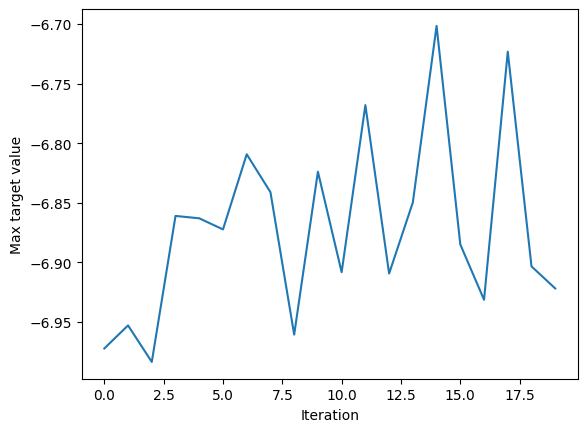

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from bayes_opt import BayesianOptimization
from scipy.spatial import distance

# データを訓練用と未知用に分割
X_known, X_unknown, y_known, y_unknown = train_test_split(
    df.values, solubility, test_size=0.4, random_state=42)

def black_box_function(**data):
    new_data = np.array(list(data.values()))
    model = RandomForestRegressor(random_state=42)
    model.fit(X_known, y_known)
    return -model.predict(new_data.reshape(1, -1))[0]

# boundsの定義
scaled_X_unknown = StandardScaler().fit_transform(X_unknown)
bounds = {'data{}'.format(i): (scaled_X_unknown[:, i].min(), scaled_X_unknown[:, i].max())
          for i in range(scaled_X_unknown.shape[1])}

# 結果を保存するリスト
max_values = []

for _ in range(20):   # 処理に時間がかかるため、繰り返しは20回とした
    optimizer = BayesianOptimization(f=black_box_function, pbounds=bounds, verbose=2, random_state=1)
    optimizer.maximize(init_points=1, n_iter=0)

    # 最適化後の最大値を追加
    max_values.append(-optimizer.max['target'])

    # 選ばれたポイントを既知のデータに追加
    chosen_point = np.array(list(optimizer.max['params'].values()))
    distances = [distance.euclidean(x, chosen_point) for x in X_unknown]
    chosen_index = np.argmin(distances)
    X_known = np.vstack((X_known, X_unknown[chosen_index]))
    y_known = np.append(y_known, y_unknown[chosen_index])

    # boundsの再定義
    scaled_X_known = StandardScaler().fit_transform(X_known)
    bounds = {'data{}'.format(i): (scaled_X_known[:, i].min(), scaled_X_known[:, i].max())
              for i in range(scaled_X_known.shape[1])}

    # 選ばれたポイントを未知のデータから削除
    X_unknown = np.delete(X_unknown, chosen_index, axis=0)
    y_unknown = np.delete(y_unknown, chosen_index)

# 各回の目的値の最大値の変化を表示する
plt.plot(max_values)
plt.xlabel('Iteration')
plt.ylabel('Max target value')
plt.show()

|   iter    |  target   |     x     |
-------------------------------------
| 1         | 0.9733    | 0.3346    |
| 2         | 0.004546  | -11.86    |
|   iter    |  target   |     x     |
-------------------------------------
| 1         | 1.459     | 0.3346    |
| 2         | 0.003486  | -11.86    |
|   iter    |  target   |     x     |
-------------------------------------
| 1         | 1.633     | 0.3346    |
| 2         | 0.9933    | 10.98     |
|   iter    |  target   |     x     |
-------------------------------------
| 1         | 1.728     | 0.3346    |
| 2         | 0.9918    | 10.98     |
|   iter    |  target   |     x     |
-------------------------------------
| 1         | 1.728     | 0.3346    |
| 2         | 0.9906    | 10.98     |
|   iter    |  target   |     x     |
-------------------------------------
| 1         | 1.74      | 0.3346    |
| 2         | 0.007328  | -11.86    |
|   iter    |  target   |     x     |
-------------------------------------
| 1         

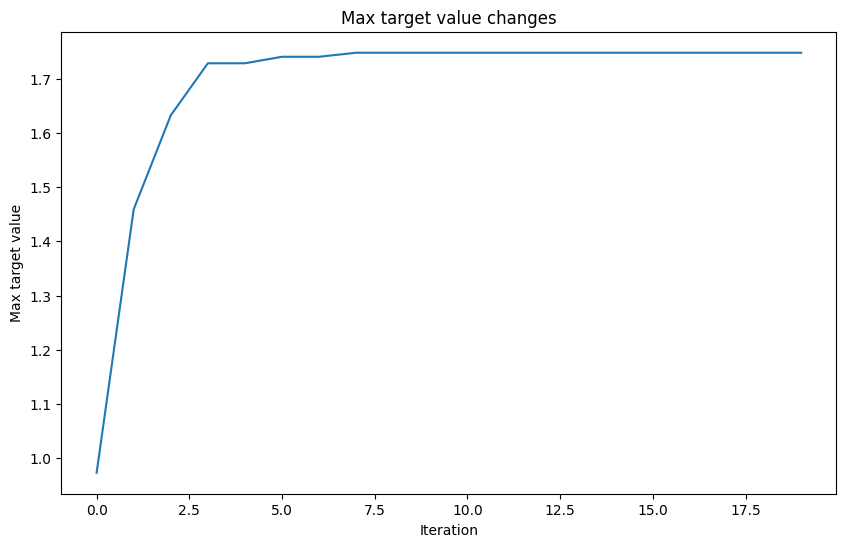

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from bayes_opt import BayesianOptimization
from scipy.spatial import distance

def black_box_function(x):
    new_data = np.array(x).reshape(1, -1)
    model = RandomForestRegressor(random_state=42)
    model.fit(X_known.reshape(-1, 1), y_known)
    return model.predict(new_data)[0]

# boundsの定義
bounds = {'x': (X_unknown.min(), X_unknown.max())}

# 最大値を保持するためのリスト
max_values = []

for _ in range(20):
    # ベイズ最適化と試行の実行
    optimizer = BayesianOptimization(f=black_box_function, pbounds=bounds, random_state=14)
    optimizer.maximize(init_points=1, n_iter=1)

    # 最適化後の目的値の最大値をリストに追加
    max_values.append(optimizer.max['target'])

    # 基準となるポイントを選出し、既知の観測（known）群に追加
    chosen_point = optimizer.max['params']['x']
    X_known = np.append(X_known, chosen_point)
    y_known = np.append(y_known, f(chosen_point))

    # boundの再定義
    bounds = {'x': (X_unknown.min(), X_unknown.max())}

    # 選ばれた観測地点を未知群から削除
    chosen_point_index = np.argmin(np.abs(X_unknown - chosen_point))
    X_unknown = np.delete(X_unknown, chosen_point_index)
    y_unknown = np.delete(y_unknown, chosen_point_index)

# 最大値の変化をプロット
plt.figure(figsize=(10, 6))
plt.plot(max_values)
plt.title('Max target value changes')
plt.xlabel('Iteration')
plt.ylabel('Max target value')
plt.show()